# Ensembles Practice

This notebook is a practice of model ensemble methods. Dataset used - https://www.kaggle.com/datasets/saurabh00007/diabetescsv

## Imports / Data load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
raw_diabetes_df = pd.read_csv('data/diabetes.csv')

raw_diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Feature Selection

In [3]:
raw_diabetes_df.corr()["Outcome"] \
    .sort_values(ascending=False) \
    .to_frame()

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


In [4]:
from mlpeople.eda import describe_dataframe
describe_dataframe(raw_diabetes_df)

,column_id,data_type,unique_values,missing_values,mean,std,min,max
0,Pregnancies,int64,17,0,3.85,3.37,0.00,17.00
1,Glucose,int64,136,0,120.89,31.97,0.00,199.00
2,BloodPressure,int64,47,0,69.11,19.36,0.00,122.00
3,SkinThickness,int64,51,0,20.54,15.95,0.00,99.00
4,Insulin,int64,186,0,79.80,115.24,0.00,846.00
5,BMI,float64,248,0,31.99,7.88,0.00,67.10
6,DiabetesPedigreeFunction,float64,517,0,0.47,0.33,0.08,2.42
7,Age,int64,52,0,33.24,11.76,21.00,81.00
8,Outcome,int64,2,0,0.35,0.48,0.00,1.00


In [5]:
diabetes_df = raw_diabetes_df[
    (raw_diabetes_df[["Glucose", "Age", "BMI"]] != 0).all(axis=1)
]
describe_dataframe(diabetes_df)

,column_id,data_type,unique_values,missing_values,mean,std,min,max
0,Pregnancies,int64,17,0,3.85,3.38,0.00,17.00
1,Glucose,int64,135,0,121.94,30.60,44.00,199.00
2,BloodPressure,int64,47,0,69.70,18.32,0.00,122.00
3,SkinThickness,int64,51,0,20.72,15.93,0.00,99.00
4,Insulin,int64,185,0,81.35,115.93,0.00,846.00
5,BMI,float64,246,0,32.45,6.93,18.20,67.10
6,DiabetesPedigreeFunction,float64,511,0,0.47,0.33,0.08,2.42
7,Age,int64,52,0,33.31,11.71,21.00,81.00
8,Outcome,int64,2,0,0.35,0.48,0.00,1.00


In [6]:
# use two features to be able to visualize plot_decision_regions
X_age = diabetes_df[['Glucose', 'Age']]
X_bmi = diabetes_df[['Glucose', 'BMI']]
y = diabetes_df['Outcome']

In [7]:
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X_age, y, test_size=0.3, stratify=y, random_state=42)
X_bmi_train, X_bmi_test, y_bmi_train, y_bmi_test = train_test_split(X_bmi, y, test_size=0.3, stratify=y, random_state=42)

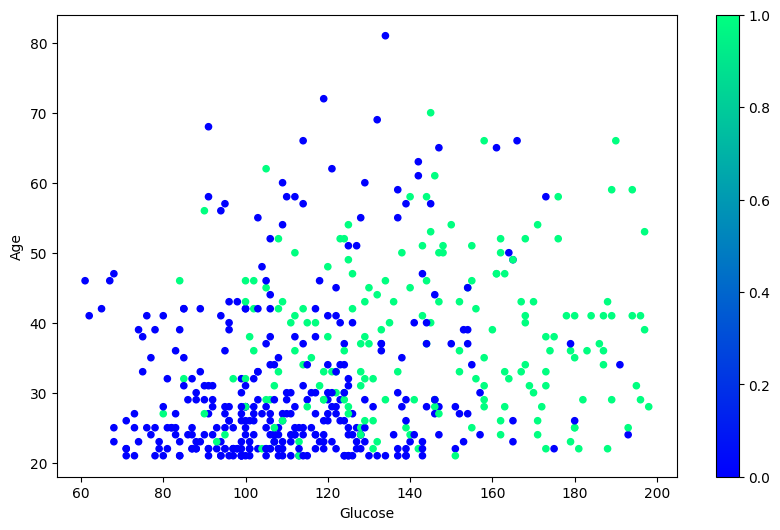

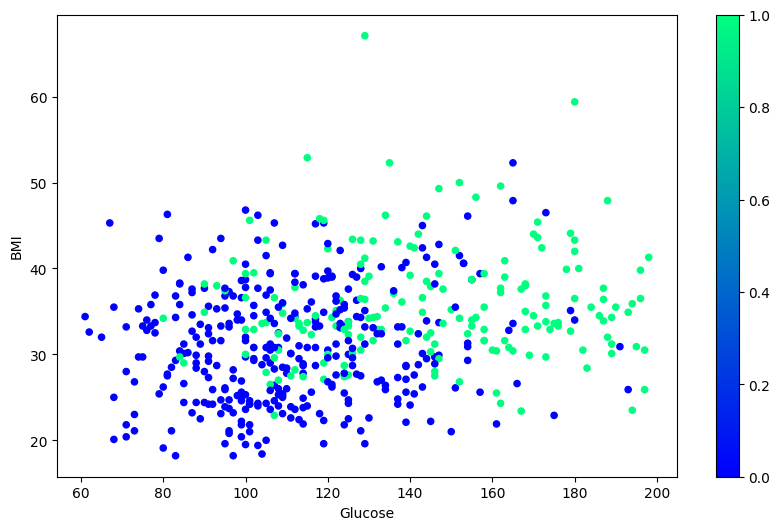

In [8]:
X_age_train.plot.scatter(x='Glucose', y='Age', c=y_age_train, cmap='winter', figsize=(10,6))
X_bmi_train.plot.scatter(x='Glucose', y='BMI', c=y_bmi_train, cmap='winter', figsize=(10,6));

## kNN model

In [9]:
def get_report(model, X_test, y_true):
    y_pred = model.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

def plot_decision_boundary(model, X, y):
    ax = plot_decision_regions(
        X.values,
        y.values,
        model
    )

    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title(f"{model.__class__.__name__} Decision Boundary ({X.columns[0]} vs {X.columns[1]})")
    plt.show()

In [10]:
knn_age = KNeighborsClassifier(n_neighbors=8)
knn_age.fit(X_age_train, y_age_train)
get_report(knn_age, X_age_test, y_age_test)

              precision    recall  f1-score   support

           0     0.7267    0.8503    0.7837       147
           1     0.5926    0.4051    0.4812        79

    accuracy                         0.6947       226
   macro avg     0.6597    0.6277    0.6325       226
weighted avg     0.6799    0.6947    0.6780       226



/opt/miniconda3/envs/mlpeople4/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


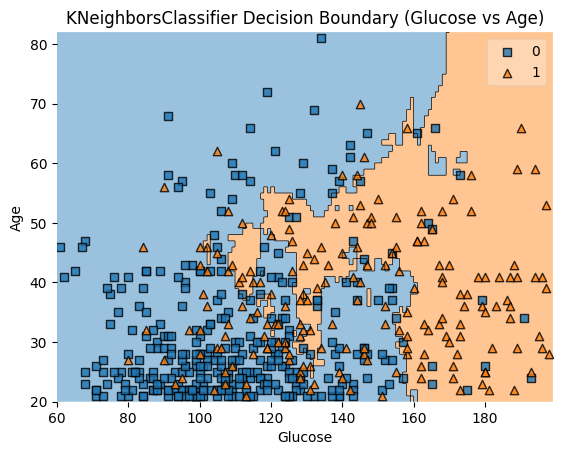

In [11]:
plot_decision_boundary(knn_age, X_age_train, y_age_train)

In [12]:
knn_bmi = KNeighborsClassifier(n_neighbors=8)
knn_bmi.fit(X_bmi_train, y_bmi_train)
get_report(knn_bmi, X_bmi_test, y_bmi_test)

              precision    recall  f1-score   support

           0     0.7158    0.8912    0.7939       147
           1     0.6279    0.3418    0.4426        79

    accuracy                         0.6991       226
   macro avg     0.6719    0.6165    0.6183       226
weighted avg     0.6851    0.6991    0.6711       226



/opt/miniconda3/envs/mlpeople4/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


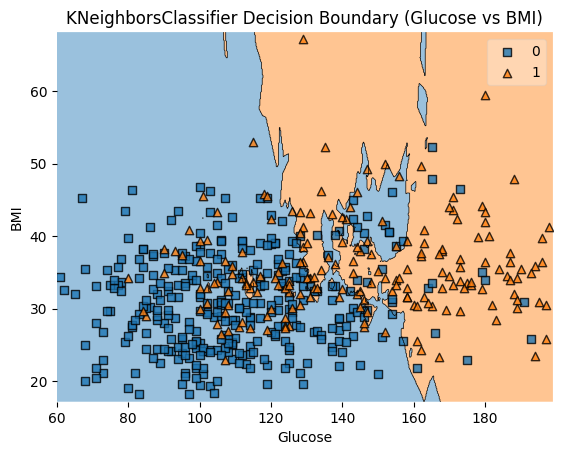

In [13]:
plot_decision_boundary(knn_bmi, X_bmi_train, y_bmi_train)

## Decision Tree

In [14]:
dt_age = DecisionTreeClassifier(max_depth=7, random_state=42)
dt_age.fit(X_age_train, y_age_train)
get_report(dt_age, X_age_test, y_age_test)

              precision    recall  f1-score   support

           0     0.7273    0.8163    0.7692       147
           1     0.5574    0.4304    0.4857        79

    accuracy                         0.6814       226
   macro avg     0.6423    0.6234    0.6275       226
weighted avg     0.6679    0.6814    0.6701       226



/opt/miniconda3/envs/mlpeople4/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


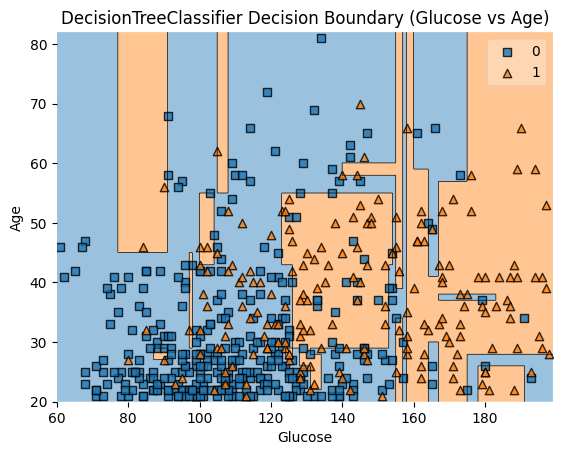

In [15]:
plot_decision_boundary(dt_age, X_age_train, y_age_train)

In [16]:
dt_bmi = DecisionTreeClassifier(max_depth=7, random_state=42)
dt_bmi.fit(X_bmi_train, y_bmi_train)
get_report(dt_bmi, X_bmi_test, y_bmi_test)

              precision    recall  f1-score   support

           0     0.7532    0.7891    0.7708       147
           1     0.5694    0.5190    0.5430        79

    accuracy                         0.6947       226
   macro avg     0.6613    0.6541    0.6569       226
weighted avg     0.6890    0.6947    0.6912       226



/opt/miniconda3/envs/mlpeople4/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


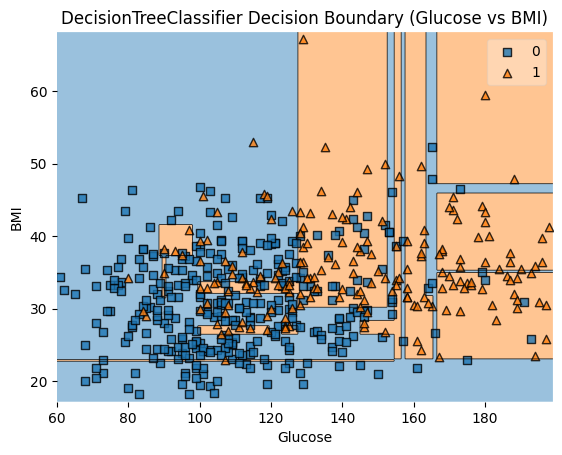

In [17]:
plot_decision_boundary(dt_bmi, X_bmi_train, y_bmi_train)

## Logistic Regression

In [18]:
log_reg_age = LogisticRegression(solver='lbfgs', max_iter = 1000)

log_reg_age.fit(X_age_train, y_age_train)
get_report(log_reg_age, X_age_test, y_age_test)

              precision    recall  f1-score   support

           0     0.7399    0.8707    0.8000       147
           1     0.6415    0.4304    0.5152        79

    accuracy                         0.7168       226
   macro avg     0.6907    0.6506    0.6576       226
weighted avg     0.7055    0.7168    0.7004       226



/opt/miniconda3/envs/mlpeople4/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


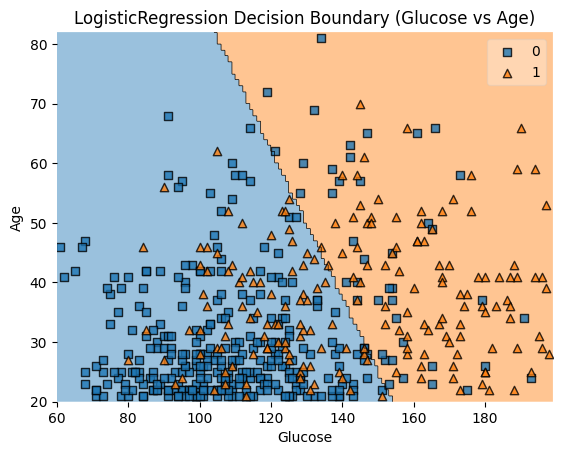

In [19]:
plot_decision_boundary(log_reg_age, X_age_train, y_age_train)

In [20]:
log_reg_bmi = LogisticRegression(solver='lbfgs', max_iter = 1000)

log_reg_bmi.fit(X_bmi_train, y_bmi_train)
get_report(log_reg_bmi, X_bmi_test, y_bmi_test)

              precision    recall  f1-score   support

           0     0.7414    0.8776    0.8037       147
           1     0.6538    0.4304    0.5191        79

    accuracy                         0.7212       226
   macro avg     0.6976    0.6540    0.6614       226
weighted avg     0.7108    0.7212    0.7042       226



/opt/miniconda3/envs/mlpeople4/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


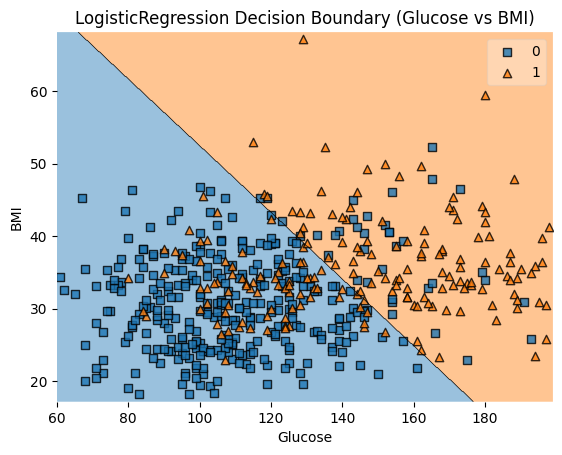

In [21]:
plot_decision_boundary(log_reg_bmi, X_bmi_train, y_bmi_train)

## Ensembling: Voting

In [22]:
from sklearn.ensemble import VotingClassifier

dt_vc_age = DecisionTreeClassifier(max_depth=7)
knn_vc_age = KNeighborsClassifier(n_neighbors=8)
log_reg_vc_age = LogisticRegression(solver='lbfgs')

# models dictionary
estimators=[('knn', knn_vc_age), ('dt', dt_vc_age), ('log_reg', log_reg_vc_age)]

# create voting classifier
ensemble_age = VotingClassifier(estimators)

ensemble_age.fit(X_age_train, y_age_train)
get_report(ensemble_age, X_age_test, y_age_test)

              precision    recall  f1-score   support

           0     0.7456    0.8571    0.7975       147
           1     0.6316    0.4557    0.5294        79

    accuracy                         0.7168       226
   macro avg     0.6886    0.6564    0.6634       226
weighted avg     0.7057    0.7168    0.7038       226



/opt/miniconda3/envs/mlpeople4/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/mlpeople4/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/miniconda3/envs/mlpeople4/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


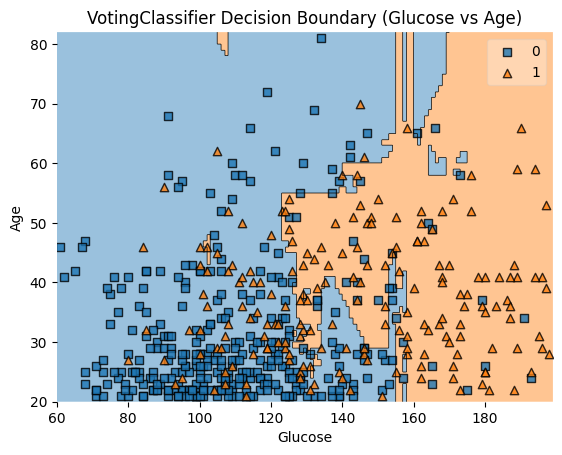

In [23]:
plot_decision_boundary(ensemble_age, X_age_train, y_age_train)